In [1]:
%matplotlib inline

import pandas as pd
import time
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
import itertools

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

# Semantic segmentation with the matrix profile

Let's see if we can find changepoints in healthcare data.

![](img/arterial_blood_pressure.png)

In [2]:
df = pd.read_csv("https://zenodo.org/record/4276400/files/Semantic_Segmentation_TiltABP.csv?download=1")
df = df.rename(columns={'abp': 'value'})
# take only the slice where the change happens for this demo
df = df.iloc[25000 - 2500: 25000 + 2500, :].reset_index(drop=True)

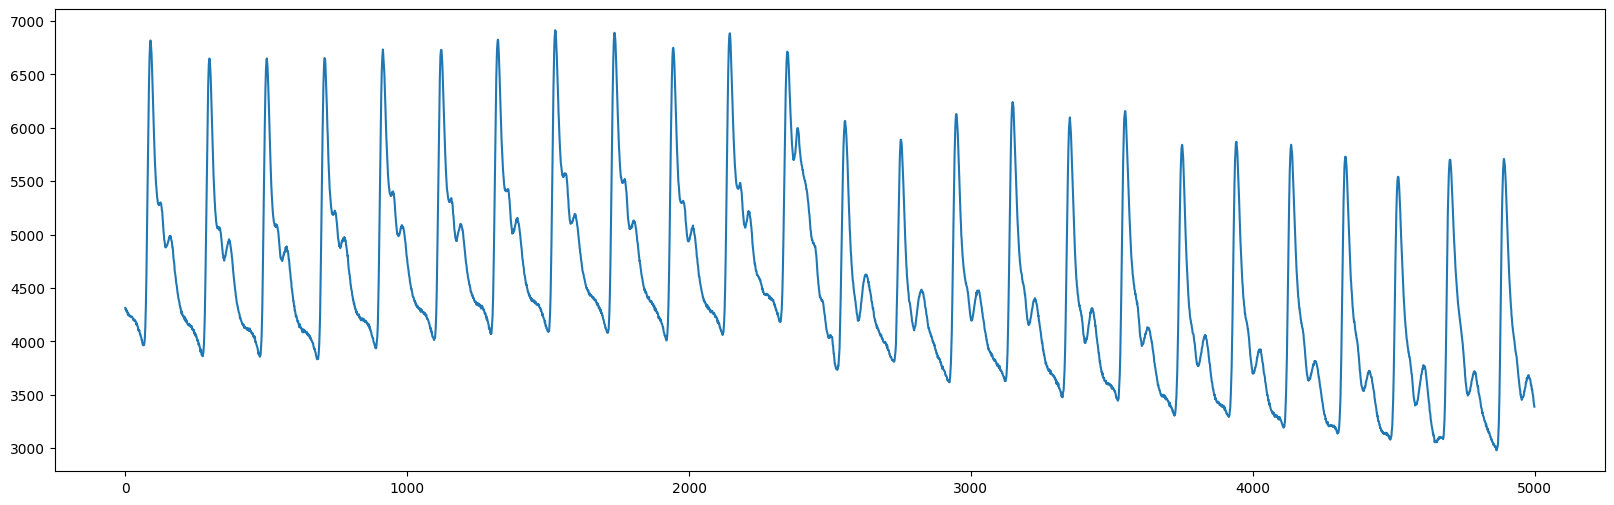

In [3]:
import matplotlib.pyplot as plt
plt.plot(df['value'])
plt.show()

## Question: is there a changepoint?

In [4]:
# pip install pyscamp
import pyscamp

In [5]:
# window of 210 --> corresponds to the arterial blood presure period
WINDOW = 210

# compute the matrix profile
profile, index = pyscamp.selfjoin(df['value'], WINDOW)

print(f"Computed the Matrix Profile for {df.size} points")

Computed the Matrix Profile for 10000 points


In [6]:
def plot_matrix_profile(series, index, num_arrows):
    style="Simple, tail_width=0.5, head_width=6, head_length=8"
    kw = dict(arrowstyle=style, color="k")
    plt.plot(series)
    
    for i in range(0, len(index), int(len(index)/num_arrows)):
        arrow = FancyArrowPatch((i, series[i] + 10), (index[i], series[index[i]] + 10), connectionstyle="arc3, rad=.5", **kw)
        plt.gca().add_patch(arrow)            
        
    plt.show()

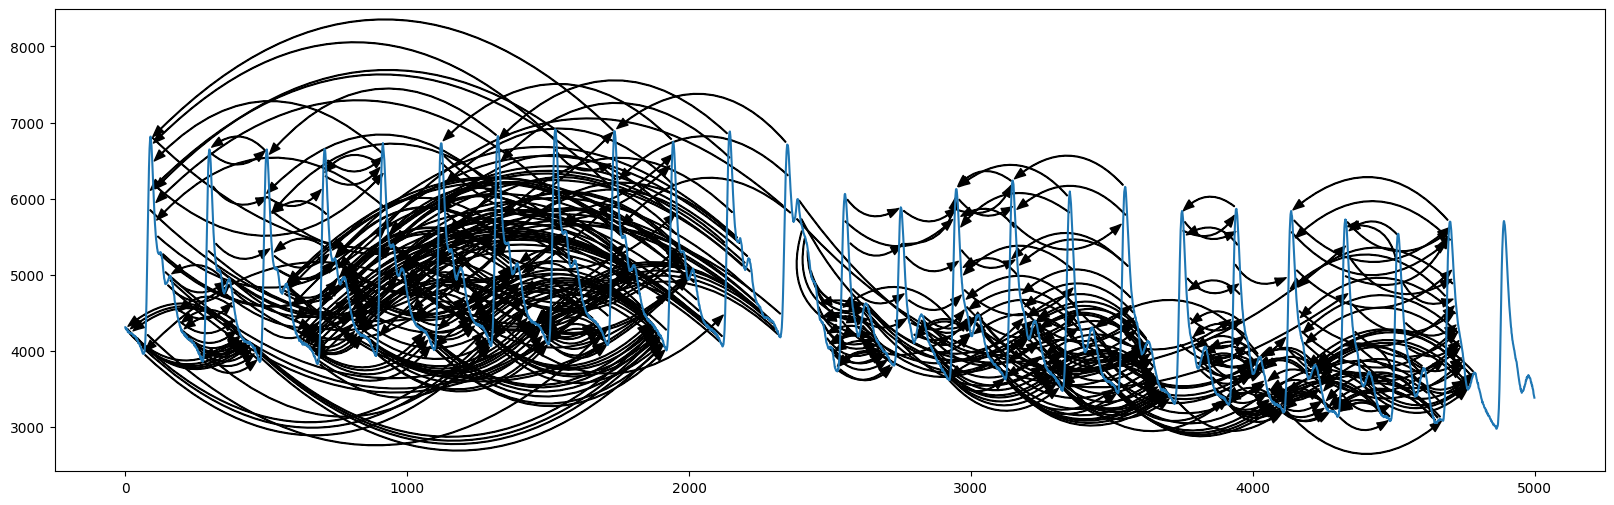

In [19]:
# visualize the nearest neighbours
plot_matrix_profile(df['value'], index, num_arrows=500)

## FLOSS algorithm
For each point: 
 count how many nearest neighbours arrows cross over the point.

![](img/floss.png)

Images from https://www.cs.ucr.edu/~eamonn/Matrix_Profile_Tutorial_Part1.pdf  
Some pieces of code from https://stumpy.readthedocs.io/en/latest/Tutorial_Semantic_Segmentation.html